# **Content**

**Regression**

  * Linear Regression
  * Gamma Regressor
  * Huber Regressor
  * Lars & Lasso
    <ul>
    <li>Lars</li>
    <li>Lars with Cross Validation</li>
    <li>Lasso</li>
    <li>Lasso with Cross Validation</li>
    <li>LassoLars</li>
    <li>LassoLars with Cross Validation</li>
    <li>LassoLars with Information-Criteria</li>
    </ul>
  * Orthoganal Marching Pursuit
    <ul>
    <li>Orthoganal Marching Pursuit</li>
    <li>Orthoganal Marching Pursuit with Cross Validation</li>
    </ul>
  * Passive Aggressive Regressor
  * Perceptron Regressor
  * Poisson Regressor
  * Quantile Regressor
  * RANSAC Regressor
  * Ridge
    <ul>
    <li>Ridge</li>
    <li>Ridge with Cross Validation</li>
    <li>Bayesian Ridge</li>
    <li>Automatic Relevance Determination Regression</li>
    </ul>
  * Elastic Nets
    <ul>
    <li>Elastic Net</li>
    <li>Elastic Net with Cross Validation</li>
    <li>Multitask Elastic Net</li>
    <li>Multitask Elastic Net with Cross Validation</li>
    </ul>
  * Stochastic Gradient Descent Regressor
  * Support Vector Machines
    <ul>
    <li>Support Vector</li>
    <li>Linear Support Vector</li>
    <li>Nu Support Vector</li>
    <li>Time Series Support Vector</li>
    </ul>
  * TheilSen Regressor
  * Time Series K Nearest Neighbors Regressor
  * Tweedie Regressor

# Using Google Colab with Tutorial

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [1]:
# Inastall the required packages
!pip install numpy
!pip install EMD_signal
!pip install ewtpy
!pip install matplotlib
!pip install padasip==1.2.2
!pip install pandas
!pip install pytz
!pip install PyWavelets
!pip install scikit_learn
!pip install sktime
!pip install scipy
!pip install seaborn
!pip install statsmodels==0.13.5
!pip install tslearn==0.6.1
!pip install vmdpy==0.2
!pip install tftb
!pip install tqdm
!pip install ssqueezepy
!pip install numba
!pip install jupyter
!pip install fastsst --no-deps
!pip install sktime
!pip install chart_studio
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.2
    Uninstalling tqdm-4.66.2:
      Successfully uninstalled tqdm-4.66.2
  Preparing metadata (setup.py) ... done
  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51651 sha256=da6ebcf038fd4ce989c2dd85006ce8a800ef7ff47054b1d1bbd2241989eb2bc9
  Stored in directory: /root/.cache/pip/wheels/a0/bb/e7/b57f417dbad7d85dbcb177f2c185543ca34a1b36541f115e95
Successfully built padasip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

Cloning into 'SensorAI'...
remote: Enumerating objects: 581, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 581 (delta 137), reused 198 (delta 116), pack-reused 358
Receiving objects: 100% (581/581), 277.97 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (271/271), done.


In [3]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

sample_data  SensorAI


In [4]:
# Change to the tutorial repository
import os

os.chdir('SensorAI')

%ls             # display directory content

anomaly_detection/  requirements.txt          tutorial_classification.ipynb
data/               sk_classifier_builder.py  tutorial_clustering.ipynb
dsp.py              sk_clustering_builder.py  tutorial_dsp.ipynb
install.sh*         sk_grid_builder.py        tutorial_regression.ipynb
instance/           sk_novelty_builder.py     utils.py
PyEMD/              sk_regressor_builder.py
README.md           temp.py


In [5]:
# This command pulls any updated files from the repository
# This code segment may be re-executed at any point if there have been updates to the repository
!git pull https://github.com/wsonguga/SensorAI.git

From https://github.com/wsonguga/SensorAI
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


# Regression

</br>

**References:**
1. https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/
2. https://www.qualtrics.com/experience-management/research/regression-analysis/

</br>

"Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them."  <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>

Regression is a type of supervised learning.

</br>

**Variables and their definitions:**

* ***Dependent Variables:*** A dependent variable is simple a varibale whose value depends on the value of one or more other variables.  In regression, we are generally want to analyze and predict dependent varibales <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

* ***Independent Variables:***  A varibale whose value does not depend on another variable.  In regression, there are different types of indpendent varibles and are listed below.

  * ***Explanatory Variables:***  Variables that explain an event or outcome in an analysis <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Predictor Variables:*** Values used to predict the value of a dependent variable <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Experimental Variables:*** Values that can be directly changed by a researcher to asses impact <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Subject Variables:*** Varibales that can't be directly manipulated, but vary across samples in your dataset <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

## Generalized Linear Models

</br>

**References:**
1. https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/
2. https://www.qualtrics.com/experience-management/research/regression-analysis/
3. https://scikit-learn.org/stable/modules/linear_model.html#id41
4. https://builtin.com/data-science/gamma-distribution
5. https://statisticsbyjim.com/probability/gamma-distribution/
6. https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab
7. https://www.statisticshowto.com/poisson-regression/
8. https://sathesant.medium.com/tweedie-loss-function-395d96883f0b
9. https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0

</br>

**Generalized Linear Models (GLM)** are group of models that are based on the basic linear model of regression.

All linear regression models use a loss function to determine the best model.  Basic linear regression models use Ordinary Least Squares (OLS).  Others more sophisticated models add other terms to the loss function.  All models in this section use OLS.

</br>

**GLMs have three components:**

1. ***Linear predictor*** - a linear combination of paramter **(b)** and explanatory value **(x)**.  <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>
2. ***Link function*** - a function that links the linear predictor and the parameter for a specific probability distribution <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>
3. ***Probability distribution*** - The data distribution that represents the observed variable **(y)**.  <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>

Example using the **logit function** as the link function and a **Bernoulli distibution** as the probability distribution, which is called **logisitic regression**:
</br></br>
  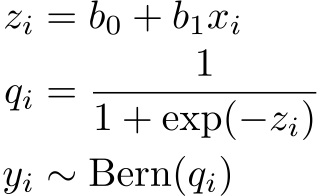
</br></br>
**Logistic Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**


**Advantages:**

* **Simple model:** Linear regression models utilize simple equations to relate features to the predicted variable. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Computationally efficient:** Linear regression model's simpliciy also makes the computationally efficient.  They are fast and can deal with large amounts of data. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Interpretability of the Output:** Linear regression models are easy to interpret.  Predections based on a feature set can be easly understood.  They can also easily show which features are most important. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

**Disadvantages:**

* **Overly-Simplistic:** Not useful for most realworld problems
. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Linearity Assumption:** "Linear regression makes strong assumptions that there is Predictor (independent) and Predicted (dependent) variables are linearly related which may not be the case."
<a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Severely affected by Outliers:** These models can be very sensitive to outliers, which can drastically alter predictions. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Independence of variables:** Linear models assume the inputs are independent.  This is rarely the case for real world data. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Assumes Homoskedacity:** Linear regression assumes a constant variance around the mean, which is rare in practical problems. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Inability to determine Feature importance:**
Correlated features can cause issues with weights.  Running the same algrothm over the same data can lead to changing feature weights. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

### Linear Regression

The most common regression type is linear regression.  It is the basis of many regression models.  This section will cover simple/basic linear regression. <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a> <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>

Linear regression analysis is based on six fundamental assumptions <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>:

1. The dependent and independent variables show a linear relationship between the slope and the intercept <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
2. The independent variable is not random <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
3. The value of the residual (error) is zero <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
4. The value of the residual (error) is constant across all observations <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
5. The value of the residual (error) is not correlated across all observations <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
6. The residual (error) values follow the **normal distribution** <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.

Note that for linear regression, the link function is the **identity link function**, which means the linear predictor and the parameter for probability distribution are identical. <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>

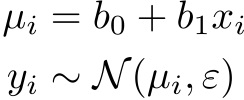

**Linear Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**


**y = b0 + b1x + e**

* **y** is the dependent variable
* **x** is the independent variable
* **$b_{0}$** is the intercept
* **$b_{1}$** is the slope
* **e** is the error

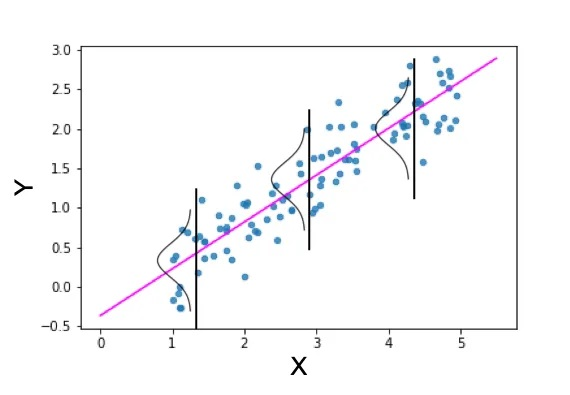

**Illustration for Linear Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**

### Gamma Regression

</br>

Gamma regression relies on the gamma distribution, which is a special case of the normal distribution <a href="https://builtin.com/data-science/gamma-distribution">[4]</a>.  It is a right-skewed normal distribution <a href="https://statisticsbyjim.com/probability/gamma-distribution/">[5]</a>.  The gamma distribution describes many real world things such as the reliabilabity of mechanical parts/components as the wear over time, cancer rates, insurance claims, and rainfall <a href="https://builtin.com/data-science/gamma-distribution">[4]</a> <a href="https://statisticsbyjim.com/probability/gamma-distribution/">[5]</a>.  It assumes all observable values are positive.

</br>

In **SKLearn**, the **Log function** is used as the link function.





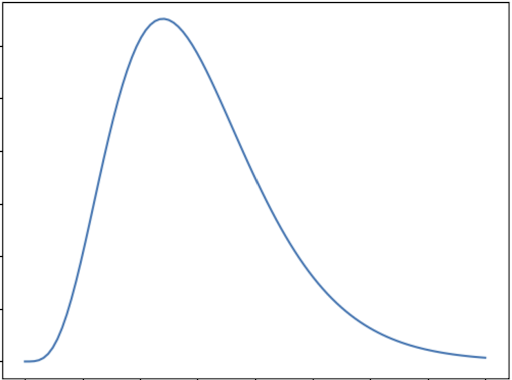

**Gamma Distribution <a href="https://scikit-learn.org/stable/modules/linear_model.html#id41">[3]</a>**

### Poisson Regression

**Poisson regression** used the Poisson distribution as the probability distribution.  **It assumes all observed values are positive**.

SKLearn uses the **log function** as the link function.


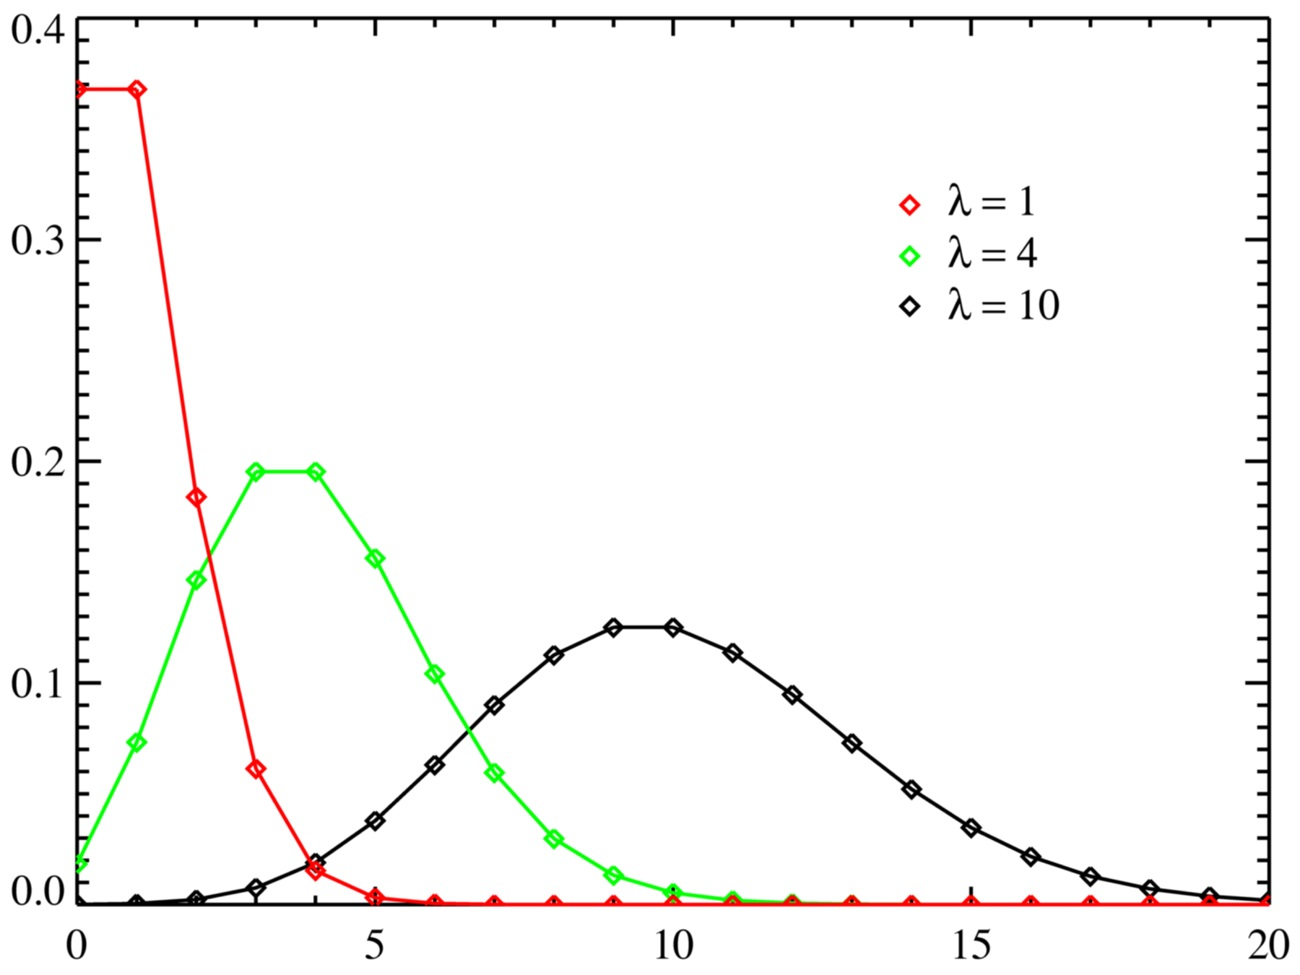

**Image from <a href="https://www.statisticshowto.com/poisson-regression/">[7]</a>**


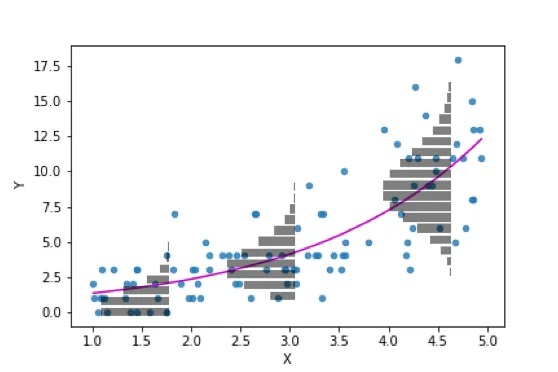

**Poison Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**

### Tweedie Regression

Tweedie regression utilizes the Tweedie distribution as the probability diatribution.  Tweedie is a special case of exponential disperion models.  Tweedie distributions are special cases of other distributions.  Tweedie's have a cluster of data at zero, but can otherwise follow other probability distributions.  This makes them useful for zero-inflated datasets like insurance claims.  <a href="https://sathesant.medium.com/tweedie-loss-function-395d96883f0b">[8]</a>

SKLearn's **Tweedie Regressor** can use Tweedie variants of Normal, Poisoon, Gamma, Inverse Gaussian, and Compound Poisoon Gamma distributions.  The **power** parameter determines which distribution to use.  Additionally, the link function can be **identity** or **log**.


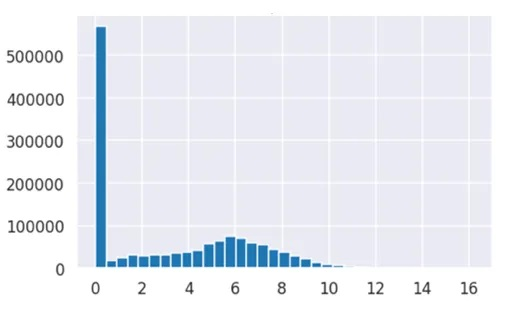

**Sample Tweedie Distribution <a href="https://sathesant.medium.com/tweedie-loss-function-395d96883f0b">[8]</a>**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-3047.732):
{'linreg__copy_X': True, 'linreg__fit_intercept': True, 'linreg__n_jobs': None, 'linreg__positive': False}


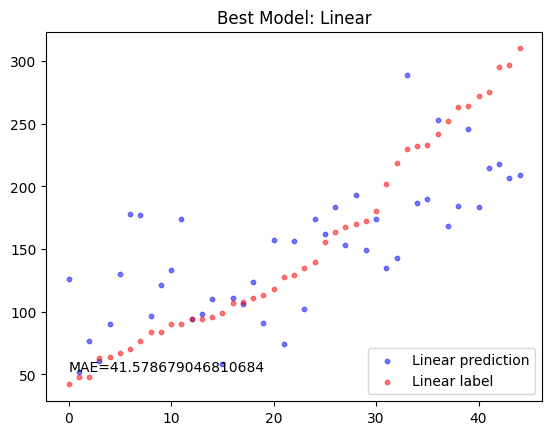

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-3376.259):
{'gamma__alpha': 1.0, 'gamma__fit_intercept': True, 'gamma__max_iter': 100, 'gamma__solver': 'lbfgs', 'gamma__tol': 0.0001, 'gamma__verbose': 0, 'gamma__warm_start': False}


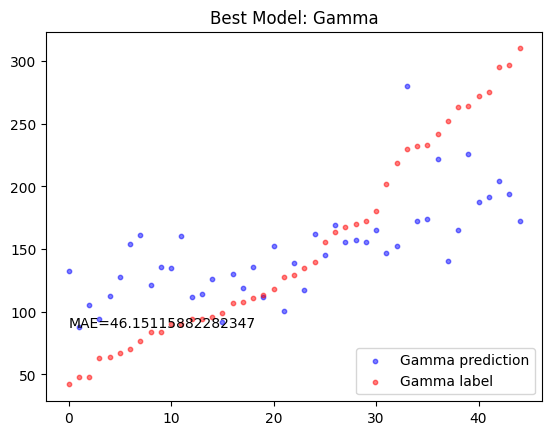

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-3024.484):
{'poisson__alpha': 1.0, 'poisson__fit_intercept': True, 'poisson__max_iter': 100, 'poisson__solver': 'lbfgs', 'poisson__tol': 0.0001, 'poisson__verbose': 0, 'poisson__warm_start': False}


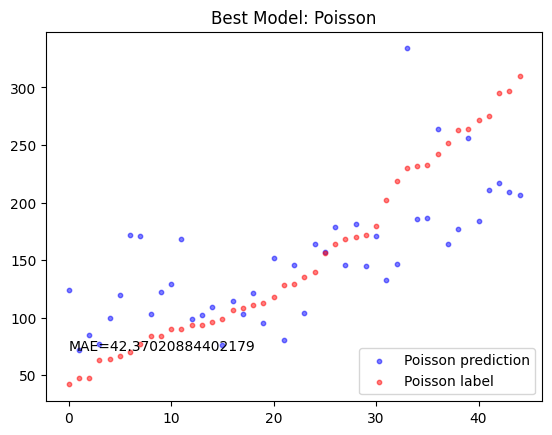

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=-2985.004):
{'tweed__alpha': 1.0, 'tweed__fit_intercept': True, 'tweed__link': 'log', 'tweed__max_iter': 100, 'tweed__power': 0, 'tweed__solver': 'newton-cholesky', 'tweed__tol': 0.0001, 'tweed__verbose': 0, 'tweed__warm_start': False}


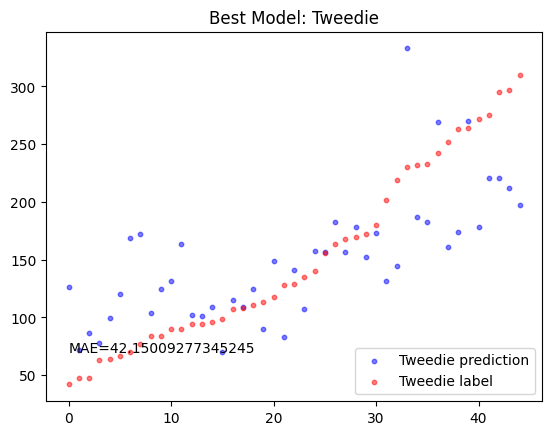

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import sk_regressor_builder as skr
import sk_grid_builder as sgb

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
#x, y = generate_regression_data(wave_number=1000)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

#print(y_test)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

lin = skr.pipeBuild_LinearRegression()
gamma = skr.pipeBuild_GammaRegressor(solver=['lbfgs','newton-cholesky'])
poiss = skr.pipeBuild_PoissonRegressor(solver=['lbfgs','newton-cholesky'])
tweed = skr.pipeBuild_TweedieRegressor(power=[0,1,2,3],link=['identity','log'], solver=['lbfgs','newton-cholesky'])

names=['Linear','Gamma','Poisson','Tweedie']
pipes=[lin,gamma,poiss,tweed]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### Lars & Lasso


</br>

**References:**
1. https://www.geeksforgeeks.org/least-angle-regression-lars/
2. https://medium.com/acing-ai/what-is-least-angle-regression-lar-bb86756f01d0
3. https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html
5. https://www.geeksforgeeks.org/understanding-lars-lasso-regression/
6. https://medium.com/@phanindra.josh/the-gifted-regressor-lasso-lars-60d78785e2f4
7. https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC>
8. https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.
9. https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6
10. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f

</br>

**Least Angle Regression Shrikage (LARS)** and **Least Absolute Shrinkage and Selection Operator (LASSO)** are two common types of regression.  These two are discussed in this section because there is a version of regression called **LassoLars** that combines these two algorithms.

#### Lars

**Least Angle Regression (LARS)**

LARS "is an algorithm used in regression for high dimensional data (i.e., data with a large number of attributes). Least Angle Regression Shrinkage is somewhat similar to forward stepwise regression. Since it is used with data that has lots of attributes, at each step, LARS finds the attribute which is most highly correlated to the target value. There may be more than one attribute that has the same correlation. In this scenario, LARS averages the attributes and proceeds in a direction that is at the same angle to the attributes. This is exactly why this algorithm is called Least Angle regression. Basically, LARS makes leaps in the most optimally calculated direction without overfitting the model."  <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

**Algorithm:**


* Normalize all values to have zero mean and unit variance. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

* Find a variable that is most highly correlated to the residual. Move the regression line in this direction until we reach another variable that has the same or higher correlation. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

**Note:** Residual is the difference between the observed value and the predicted value. Variable, here implies an attribute. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>


* When we have two variables that have the same correlation, move the regression line at an angle that is in between (i.e., least angle between the two variables). <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

* Continue this until all of our data is exhausted or until you think the model is big and ‘general’ enough. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>


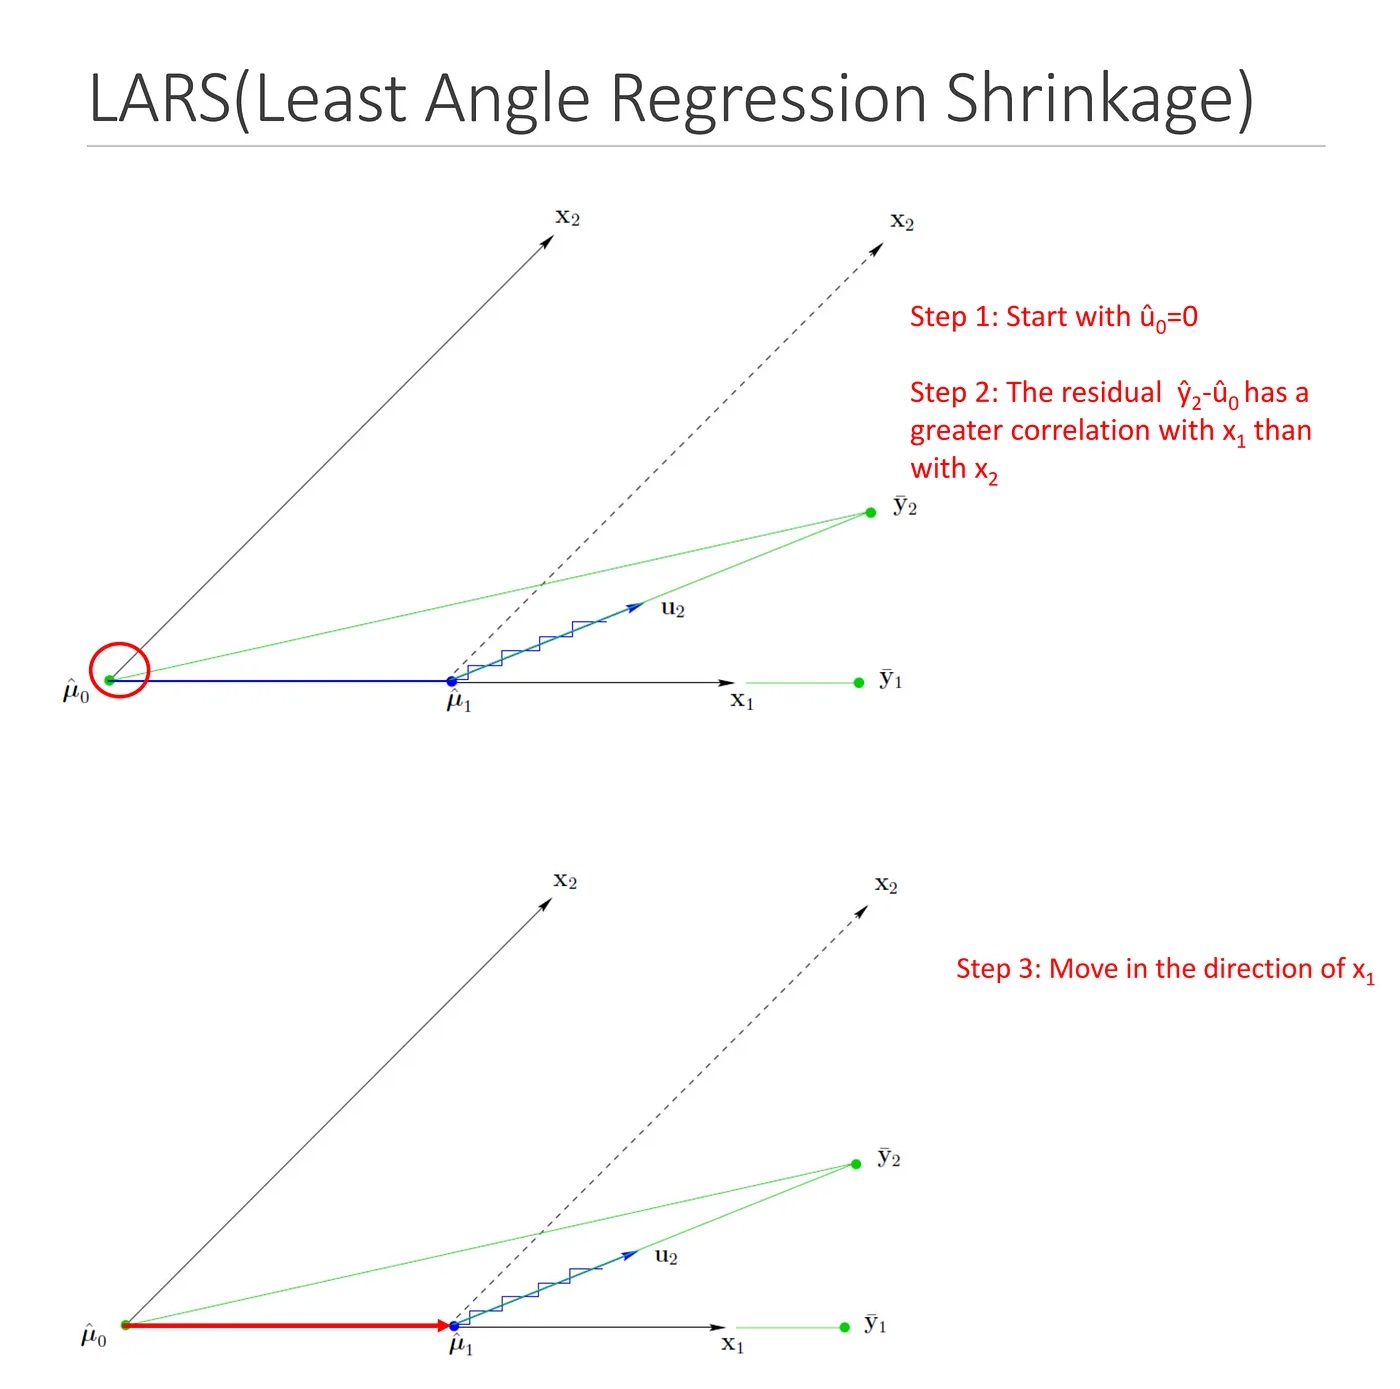

**LARS <a href="https://medium.com/@phanindra.josh/the-gifted-regressor-lasso-lars-60d78785e2f4">[6]</a>**

LARS works as follows:

* All coefficients, ***'B'*** are set to ***0***. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* The predictor, **$x_j$** is found that is most correlated to y. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Increase the coefficient **$B_j$** in the direction that is most correlated with y and stop when you find some other predictor. **$x_k$** the has equal or higher correlation than **$x_j$**. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Extend (**$B_j$**, **$B_k$**) in a direction that is equiangular (has the same angle) to both **$x_j$** and **$x_k$**. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Continue and repeat until all predictors are in the model. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

#### Lars with Cross Validation

In **SKLearn**, this is simply Lars with built in cross validation.

#### Lasso

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

LASSO regression attempts to find a balance between model simplicity and accuracy, by adding a penalty term to the traditional linear regression model.  This can provide sparse solutions where some coefficients are forced to be exactly zero, which makes LASSO particularly useful for feature selection because it can automatically identify and discard variables that are either redundant or irrelavant.  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


Lasso is used over regression methods for a more accurate prediction. "This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination."  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


**How LASSO regression works:**

1. **Linear regression model**: LASSO regression starts with the standard linear regression model, which assumes a linear relationship between the independent variables (features) and the dependent variable (target). The linear regression equation can be represented as follows:  **y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε**.  Where: <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **y** is the dependent variable (target). <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **β₀, β₁, β₂, ..., βₚ** are the coefficients (parameters) to be estimated. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **x₁, x₂, ..., xₚ** are the independent variables (features). <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **ε** represents the error term. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

2. **L1 regularization**: LASSO regression introduces an additional penalty term based on the absolute values of the coefficients. The **L1 regularization** term is the sum of the absolute values of the coefficients multiplied by a tuning parameter **λ: L₁ = λ * (|β₁| + |β₂| + ... + |βₚ|)**.  Where: <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>  
  * **λ** is the regularization parameter that controls the amount of regularization applied. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **β₁, β₂, ..., βₚ** are the coefficients. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

3. **Objective function**: The objective of LASSO regression is to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values, while also minimizing the L1 regularization term: Minimize: **RSS + L₁** Where:  
  * **RSS** is the residual sum of squares, which measures the error between the predicted values and the actual values. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

4. **Shrinking coefficients**: By adding the L1 regularization term, LASSO regression can shrink the coefficients towards zero. When **λ** is sufficiently large, some coefficients are driven to exactly zero. This property of LASSO makes it useful for feature selection, as the variables with zero coefficients are effectively removed from the model. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

5. **Tuning parameter λ**: The choice of the regularization parameter **λ** is crucial in LASSO regression. A larger **λ** value increases the amount of regularization, leading to more coefficients being pushed towards zero. Conversely, a smaller **λ** value reduces the regularization effect, allowing more variables to have non-zero coefficients. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

6. **Model fitting**: To estimate the coefficients in LASSO regression, an optimization algorithm is used to minimize the objective function. Coordinate Descent is commonly employed, which iteratively updates each coefficient while holding the others fixed. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

LASSO regression offers a powerful framework for both prediction and feature selection, especially when dealing with high-dimensional datasets where the number of features is large. By striking a balance between simplicity and accuracy, LASSO can provide interpretable models while effectively managing the risk of overfitting. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


**Pros and Cons of LASSO <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[10]</a>:**

</br>

***Pros***

*Select features, by shrinking co-efficient towards zero.
*Avoids over fitting

***Cons***

*Selected features will be highly biased.
* For n << p (n-number of data points, p-number of features), LASSO selects at most n features.
* LASSO will select only one feature from a group of correlated features, the selection is arbitrary in nature.
* For different boot strapped data, the feature selected can be very different.
* Prediction performance is worse than Ridge regression.

#### Lasso with Cross Validation

In SKLearn, this is simply Lasso with built in cross validation.

#### LassoLars

The LassoLars (aka Least Angle Regression Lasso) regressor is a Lasso model fit with Lars.  It is essentially a linear model trained with an L1 prior as a regularizer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">[4]</a> <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>.  LassoLars is used in linear regression to decrease the number of features and enhance the model’s predictive ability <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>. LassoLars causes certain regression coefficients shrink to zero as a result of penalizing the absolute values of the regression coefficients <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>. By removing features from the model, the data is easier to understand and more economical. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

"LassoLars in linear regression combines the regularization capabilities of L1 regularization (also called Lasso) with the efficiency of forward selection. Loss of arousal As it moves in the direction of the target variable's greatest correlation, Lasso gradually adds features to the model. This process is continued until a point is reached at which the correlation between the additional variable and the original one would be equal. Due to its tendency to choose a sparse subset of characteristics, this approach works especially well with high-dimensional data. Models with fewer non-zero coefficients are encouraged to be sparse by the regularization term (L1 penalty)."  <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

***Benfits of LassoLars over Lasso:***

1. **Efficiency**: For big datasets with plenty of characteristics, LassoLars is computationally more efficient than Lasso regression. This is because, instead of tackling a challenging optimization issue, it makes use of an effective method that repeatedly adds the most illuminating characteristic at each phase. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

2. **Stability**: The LassoLars is renowned for its ability to choose features steadily. LassoLars offers a consistent feature selection procedure that is less vulnerable to fluctuations in the data, in contrast to Lasso regression, which might be sensitive to the sequence in which features are introduced to the model. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

3. **Interpretability**: LassoLars's path of coefficient estimates offers important information about the relative significance of various characteristics. The characteristics that most substantially increase the model's prediction capacity may be found by tracking the coefficients' changes throughout the regularization process. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

***LassoLars Concepts:***

* **L1-Regularization**: The linear regression objective function gains a penalty term from LassoLars depending on the absolute values of the coefficients. In order to encourage sparsity, this pushes some coefficients to be exactly zero. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Regularization strength (alpha)**: The Lasso and LassoLars coefficients' intensity of penalty is determined by the regularization parameter alpha. A sparser model is produced when the alpha value is higher since it causes the coefficients to shrink more.  Cross-validation is usually used to establish the ideal value of alpha. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Coefficient Path**: As the regularization parameter alpha changes from 0 to 1 (or any other maximum value), LassoLars generates a path of coefficient estimates. Given that the coefficients of more significant characteristics tend to vary more gradually along the road, this path provides light on the relative value of the features. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Forward Feature Selection**: Forward feature selection is carried out by LassoLars, which means that it adds predictors to the model one at a time and advances in the direction of the predictor that has the highest correlation with the response at each step. Its efficiency in high-dimensional spaces arises from this. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Orthogonal Active Sets**: The predictors that have been added to the model are the orthogonal active set of predictors that LassoLarso keeps track of. It is computationally efficient because of this orthogonalization. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

#### LassoLars with Cross Validation

In SKLearn, this is simply LassoLars with built in cross validation.

#### LassoLars with Information-Criteria

This is a modification of the LassoLars model.  It can use the Akaiki information criterion (AIC) or the Bayes Information Crieterion (BIC).  Both of these criteria are used to better select the value of the regularization parameter.  They make a trade-off between the goodness of fit and model complexity. <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC">[7]</a>  In this approach, multiple models are created with differing combinations of the independent variables.  Then either AIC or BIC is used to compare them to choose the best one.

The **Akaike information criterion (AIC)** is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:  <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

* the number of independent variables used to build the model. <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

* the maximum likelihood estimate of the model (how well the model reproduces the data). <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables. <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

</br>

**AIC = 2K - 2*ln*(L)**

* **K** is the number of independent variables
* **L** is the log-likelihood estimate

The **Bayesian information criterion (BIC)** is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to AIC. <a href="https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6">[9]</a>

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. The BIC resolves this problem by introducing a penalty term for the number of parameters in the model. The penalty term is larger in BIC than in AIC. <a href="https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6">[9]</a>

</br>

**BIC = *ln*(n)k - 2*ln*(L^)**

* **L^** is the maximized value of the likelihood function of the model
* **n** is the numbar of data points
* **k** is the number of free parameters to be estimated

Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-569.820):
{'lars__copy_X': True, 'lars__eps': 2.220446049250313e-16, 'lars__fit_intercept': True, 'lars__fit_path': True, 'lars__jitter': None, 'lars__n_nonzero_coefs': 500, 'lars__precompute': 'auto', 'lars__verbose': False}


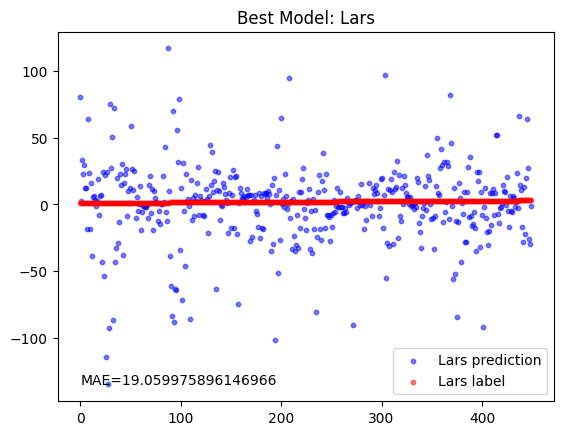

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.108):
{'larscv__copy_X': True, 'larscv__cv': None, 'larscv__eps': 2.220446049250313e-16, 'larscv__fit_intercept': True, 'larscv__max_iter': 500, 'larscv__max_n_alphas': 1000, 'larscv__n_jobs': None, 'larscv__normalize': 'deprecated', 'larscv__precompute': 'auto', 'larscv__verbose': False}


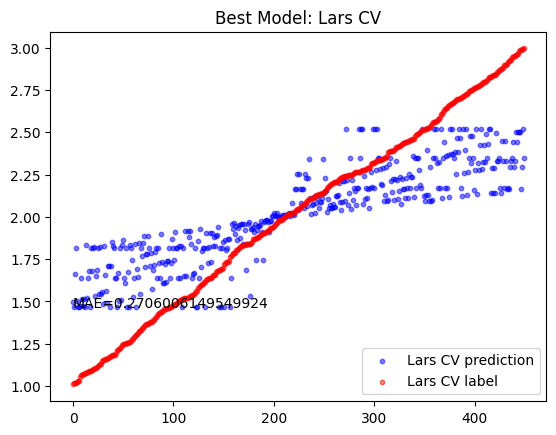

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.184):
{'lasso__alpha': 0.5, 'lasso__copy_X': True, 'lasso__fit_intercept': True, 'lasso__max_iter': 200, 'lasso__positive': False, 'lasso__precompute': False, 'lasso__selection': 'random', 'lasso__tol': 0.0001, 'lasso__warm_start': False}


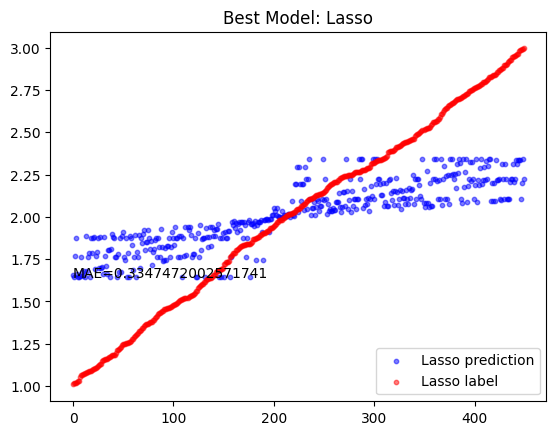

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.052):
{'lassocv__alphas': None, 'lassocv__copy_X': True, 'lassocv__cv': None, 'lassocv__eps': 0.01, 'lassocv__fit_intercept': True, 'lassocv__max_iter': 1000, 'lassocv__n_alphas': 100, 'lassocv__n_jobs': None, 'lassocv__positive': False, 'lassocv__precompute': 'auto', 'lassocv__selection': 'random', 'lassocv__tol': 0.0001, 'lassocv__verbose': False}


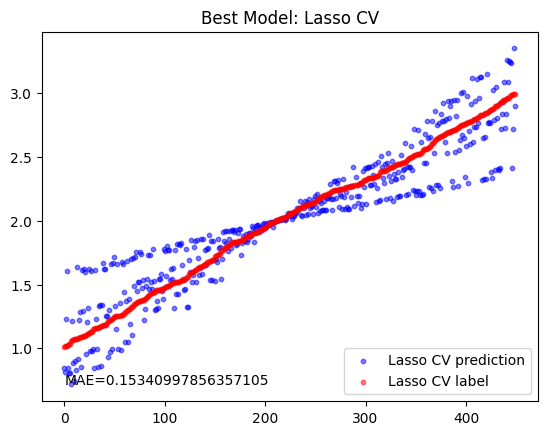

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.337):
{'lassolars__alpha': 1.0, 'lassolars__copy_X': True, 'lassolars__eps': 2.220446049250313e-16, 'lassolars__fit_intercept': True, 'lassolars__fit_path': True, 'lassolars__jitter': None, 'lassolars__max_iter': 500, 'lassolars__normalize': 'deprecated', 'lassolars__positive': False, 'lassolars__precompute': 'auto', 'lassolars__verbose': False}


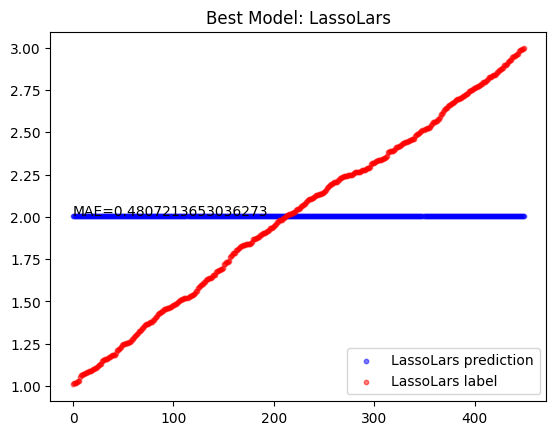

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.052):
{'lassolarscv__copy_X': True, 'lassolarscv__cv': None, 'lassolarscv__eps': 2.220446049250313e-16, 'lassolarscv__fit_intercept': True, 'lassolarscv__max_iter': 500, 'lassolarscv__max_n_alphas': 1000, 'lassolarscv__n_jobs': None, 'lassolarscv__normalize': 'deprecated', 'lassolarscv__positive': False, 'lassolarscv__precompute': 'auto', 'lassolarscv__verbose': False}


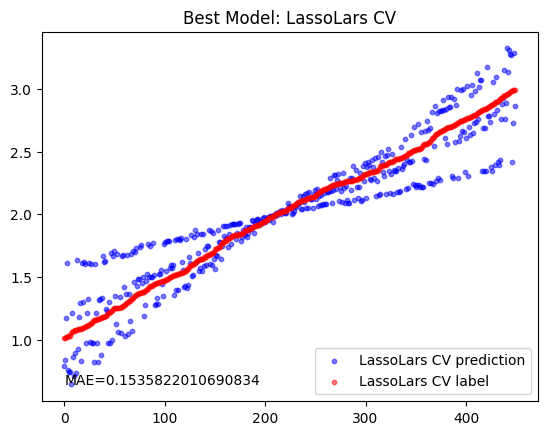

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.052):
{'lassolarsic__copy_X': True, 'lassolarsic__criterion': 'aic', 'lassolarsic__eps': 2.220446049250313e-16, 'lassolarsic__fit_intercept': True, 'lassolarsic__max_iter': 500, 'lassolarsic__noise_variance': None, 'lassolarsic__normalize': 'deprecated', 'lassolarsic__positive': False, 'lassolarsic__precompute': 'auto', 'lassolarsic__verbose': False}


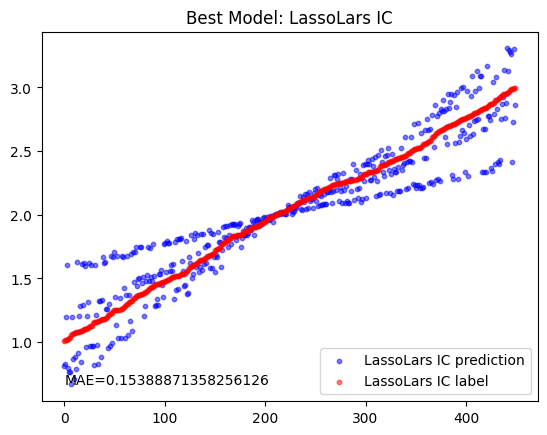

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import sk_regressor_builder as skr
import sk_grid_builder as sgb

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(wave_number=1500)

print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

lars = skr.pipeBuild_Lars()
lasso = skr.pipeBuild_Lasso(alpha=[0.5],selection=['cyclic','random'],max_iter=[200])
larscv = skr.pipeBuild_LarsCV()
lassocv = skr.pipeBuild_LassoCV(eps=[0.01],selection=['random'])
lassolars = skr.pipeBuild_LassoLars()
lassolarscv = skr.pipeBuild_LassoLarsCV()

# LassoLarsIC won't work if number of samples (waveforms) is less than number of
# than number of features (length of one input)
# Waveform generator produce a signal of 1000 samples
lassolarsic = skr.pipeBuild_LassoLarsIC(criterion=['aic','bic'])

names=['Lars','Lars CV','Lasso','Lasso CV','LassoLars','LassoLars CV','LassoLars IC']
pipes=[lars,larscv,lasso,lassocv,lassolars,lassolarscv,lassolarsic]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### Ridge

</br>

**References:**
1. https://www.mygreatlearning.com/blog/what-is-ridge-regression/
2. https://www.ibm.com/topics/ridge-regression
3. https://spotintelligence.com/2023/05/26/l1-l2-regularization/
4. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f


</br>

"Ridge regression is a model-tuning method that is used to analyze any data that suffers from multicollinearity" <a href="https://www.mygreatlearning.com/blog/what-is-ridge-regression/">[1]</a>.   It is also known as ***L2 regularization*** and is one of several types of regularization for linear regression models. "When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values" <a href="https://www.mygreatlearning.com/blog/what-is-ridge-regression/">[1]</a>.

"Regularization is a statistical method to reduce errors caused by overfitting on training data. Ridge regression specifically corrects for multicollinearity in regression analysis. This is useful when developing machine learning models that have a large number of parameters, particularly if those parameters also have high weights. While this article focuses on regularization of linear regression models, note that ridge regression may also be applied in logistic regression." <a href="https://www.ibm.com/topics/ridge-regression">[2]</a>

L2 regularization adds the sum of the squared values of the model's coefficients to the loss function. Unlike L1 regularization, L2 regularization does not force the coefficients to be exactly zero but instead encourages them to be small. L2 regularization can prevent overfitting by spreading the influence of a single feature across multiple features. It is advantageous when there are correlations between the input features.

Mathematically, the L2 regularization term can be written as <a href="https://spotintelligence.com/2023/05/26/l1-l2-regularization/">[3]</a>:

</br>

  ***L2 regularization = λ * Σ(wi^2)***  <a href="https://spotintelligence.com/2023/05/26/l1-l2-regularization/">[3]</a>

</br>

Similar to L1 regularization, λ is the regularization parameter, and wi represents the model coefficients. The sum is taken over all coefficients, and the squares of the coefficients are summed. <a href="https://spotintelligence.com/2023/05/26/l1-l2-regularization/">[3]</a>

The choice between L1 and L2 regularization depends on the specific problem and the characteristics of the data. For example, L1 regularization produces sparse models, which can be advantageous when feature selection is desired. L2 regularization, on the other hand, encourages small but non-zero coefficients and can be more suitable when there are strong correlations between features. <a href="https://spotintelligence.com/2023/05/26/l1-l2-regularization/">[3]</a>

</br>

**Pros & Cons of Ridge <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[4]</a>:**

</br>

***Pros***

* Trades variance for bias (i.e. in presence of co-linearity, it is worth to have biased results, in order to lower the variance.)
* Prevents over fitting

***Cons***

* Increases bias
* Need to select perfect alpha (hyper parameter)
* Model interpret-ability is low

#### Ridge with Cross Validation

In SKLearn, this is simply Ridge Regression with built in cross-validation.

#### Bayesian Ridge

</br>

**References:**

1. https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression
2. https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression

</br>

Bayesian Ridge works similar to the standard ridge.  However unlike the standard ridge where  λ is set manually, Bayessian Ridge tune the parameters based on prior data using Bayes Theorem.  <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>  It assumes a spherical gaussian distribution.  <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

#### Automatic Relevance Determination Regression

</br>

**References:**
1. "https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca"

</br>

Automatic Relevance Determination (ARD) is a regression technique that is used to automatically select the most relevant features of a dataset.  It is a Bayesian regression techinque.  It is also known as Relevance Vector Regression (RVR).  ARD assisgns weights to each feature during the modeling process.  Features with higher weights are considered the most important.  <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

ARD models feature weights as latent variables. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

It assumes an eliptical gaussian distribution instead of a spherical one.  <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

**Advantages:**

* Feature Selection ARD regression automatically determines the relevance of features, reducing the risk of overfitting and eliminating the need for manual feature selection. This results in more robust models that capture the most informative aspects of the data. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

* Model Interpretability By assigning relevance weights to each feature, ARD regression provides insights into the importance of different variables in the predictive process. This not only enhances the interpretability of the model but also aids in identifying key drivers behind the predictions. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

* Computational Efficiency ARD regression effectively handles high-dimensional datasets by discarding irrelevant features, reducing the dimensionality of the problem. This leads to faster training and inference times, making it suitable for large-scale data analysis. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

Length of waveform 1000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.110):
{'ridge__alpha': 2.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__tol': 0.0001}


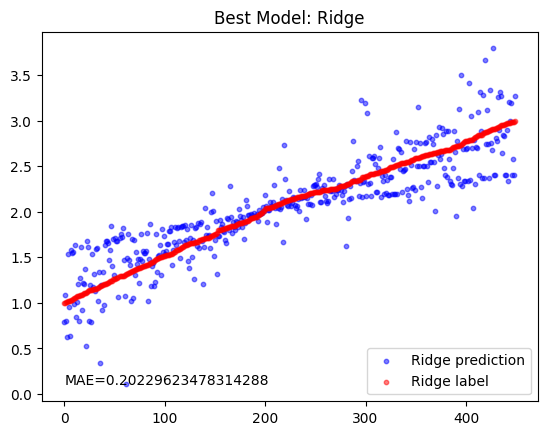

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.068):
{'ridgecv__alpha_per_target': False, 'ridgecv__alphas': (0.2, 2.0, 20.0), 'ridgecv__fit_intercept': True, 'ridgecv__gcv_mode': 'auto', 'ridgecv__scoring': None, 'ridgecv__store_cv_values': False}


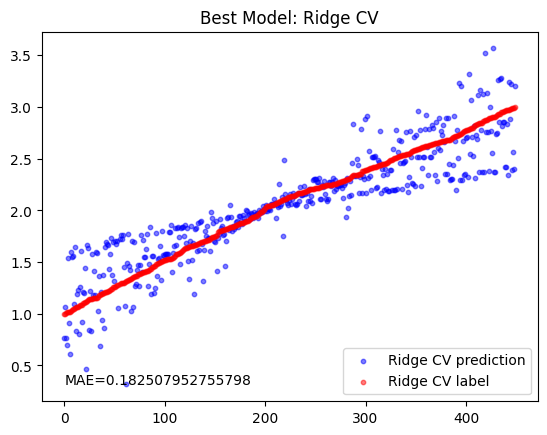

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.053):
{'bayridge__alpha_1': 1e-06, 'bayridge__alpha_2': 1e-06, 'bayridge__alpha_init': None, 'bayridge__compute_score': False, 'bayridge__copy_X': True, 'bayridge__fit_intercept': True, 'bayridge__lambda_1': 1e-06, 'bayridge__lambda_2': 1e-06, 'bayridge__lambda_init': None, 'bayridge__tol': 0.001, 'bayridge__verbose': False}


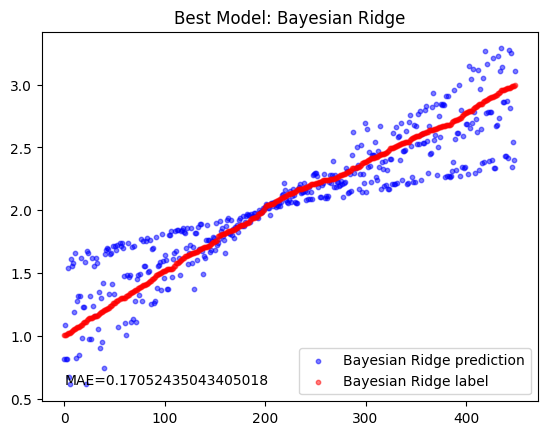

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.050):
{'ard__alpha_1': 1e-06, 'ard__alpha_2': 1e-06, 'ard__compute_score': False, 'ard__copy_X': True, 'ard__fit_intercept': True, 'ard__lambda_1': 1e-06, 'ard__lambda_2': 1e-06, 'ard__threshold_lambda': 10000, 'ard__tol': 0.001, 'ard__verbose': False}


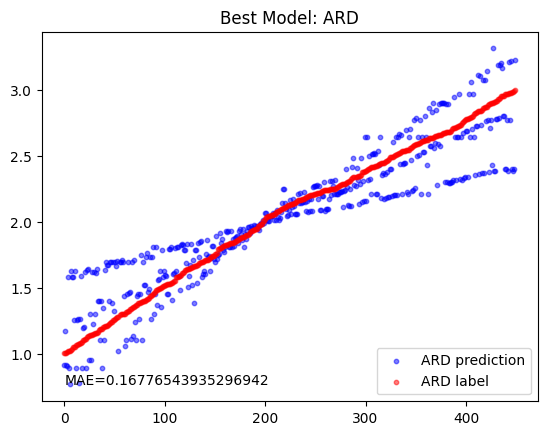

In [7]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import sk_regressor_builder as skr
import sk_grid_builder as sgb

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(wave_number=1500)

print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

ridge = skr.pipeBuild_Ridge(alpha=[1.0,2.0])
ridgecv = skr.pipeBuild_RidgeCV(alphas=[(0.1, 1.0, 10.0),(0.2, 2.0, 20.0)])
bayridge = skr.pipeBuild_BayesianRidge()
ard = skr.pipeBuild_ARDRegression()

names=['Ridge','Ridge CV','Bayesian Ridge','ARD']
pipes=[ridge,ridgecv,bayridge,ard]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### Elastic Nets

</br>

**References:**

1. https://spotintelligence.com/2023/05/26/l1-l2-regularization/
2. https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net
3. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f

</br>

Elastic Nets are simply regression models that include both L1 and L2 regularization.  A combination of Lasso and Ridge. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

The Elastic Net regularization term is defined as <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>:

</br>

***Elastic Net regularization = λ1 * Σ|wi| + λ2 * Σ(wi^2) <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>***

</br>

Here, wi represents the individual model coefficients and the sums are taken over all coefficients. λ1 and λ2 are regularization parameters that control the strength of L1 and L2 regularization, respectively. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

Elastic Net regularization combines the advantages of both L1 and L2 regularization. The L1 regularization term encourages sparsity and feature selection, driving some coefficients to exactly zero. This helps in selecting the most relevant features and reducing the complexity of the model. On the other hand, the L2 regularization term encourages smaller but non-zero coefficients, preventing any one feature from dominating the model's predictions and improving the model's stability. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

The values of **λ1** and **λ2** control the balance between L1 and L2 regularization. A higher value λ1 emphasizes sparsity, promoting feature selection, while a higher value of **λ2** emphasizes weight shrinkage and overall complexity control. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

Elastic Net regularization is particularly useful when dealing with datasets that have high-dimensional features and strong feature correlations. It provides a flexible regularization approach that allows for a trade-off between feature selection and weight shrinkage based on the specific problem and the desired behaviour of the model. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

**Pros & Cons of Elastic Nets <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[3]</a>:**

</br>

***Pros***

* Doesn’t have the problem of selecting more than n predictors when n << p, whereas LASSO saturates when n << p.

***Cons***

* Computationally more expensive than LASSO or Ridge.

#### Elastic Net with Cross Validation

This SKLearn regrossor includes cross-validation.

#### Multitask Elastic Net

The MultiTaskElasticNet is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: Y is a 2D array of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

Mathematically, it consists of a linear model trained with a mixed $L_1L_2$-norm and $L_2$-norm for regularization. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

The implementation in the class MultiTaskElasticNet uses coordinate descent as the algorithm to fit the coefficients. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

#### Multitask Elastic Net with Cross Validation

The class MultiTaskElasticNetCV can be used to set the parameters ***alpha (a)*** and ***l1_ratio (p)*** by cross-validation. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

Length of waveform 1000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.181):
{'elastic__alpha': 1.0, 'elastic__copy_X': True, 'elastic__fit_intercept': True, 'elastic__l1_ratio': 0.5, 'elastic__max_iter': 1000, 'elastic__positive': False, 'elastic__precompute': False, 'elastic__selection': 'random', 'elastic__tol': 0.0001, 'elastic__warm_start': False}


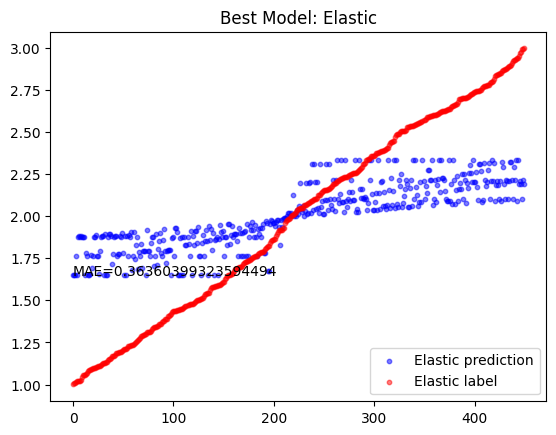

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.049):
{'elasticcv__alphas': None, 'elasticcv__copy_X': True, 'elasticcv__cv': None, 'elasticcv__eps': 0.001, 'elasticcv__fit_intercept': True, 'elasticcv__l1_ratio': 0.5, 'elasticcv__max_iter': 1000, 'elasticcv__n_alphas': 100, 'elasticcv__n_jobs': None, 'elasticcv__positive': False, 'elasticcv__precompute': 'auto', 'elasticcv__selection': 'cyclic', 'elasticcv__tol': 0.0001, 'elasticcv__verbose': 0}


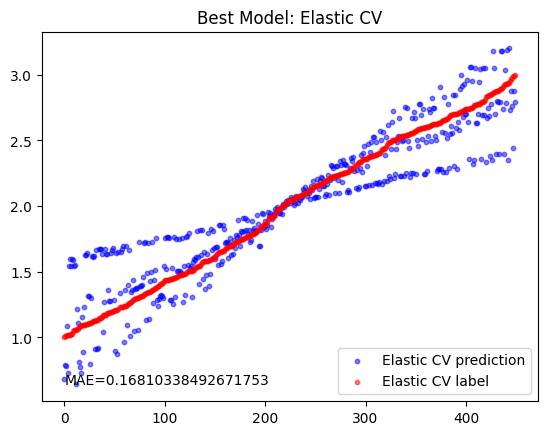

In [9]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import sk_regressor_builder as skr
import sk_grid_builder as sgb

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(wave_number=1500)

print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
elastic = skr.pipeBuild_ElasticNet(selection=['cyclic','random'])
elastcv = skr.pipeBuild_ElasticNetCV()

# Multi Labeled Data
mten = skr.pipeBuild_MultiTaskElasticNet()
mtencv = skr.pipeBuild_MultiTaskElasticNetCV()

names=['Elastic','Elastic CV']
pipes=[elastic,elastcv]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Huber Regression

## Orthoganal Marching Pursuit

### Orthoganal Marching Pursuit

### Orthoganal Marching Pursuit with Cross Validation

## Passive Aggressive Regressor

## Perceptron Regressor

## Quantile Regressor

## RANSAC Regressor

## Stochastic Gradient Descent Regressor

## Support Vector Machines

### Support Vector

### Linear Support Vector

### Nu Support Vector

### Time Series Support Vector

## TheilSen Regressor

## Time Series K Nearest Neighbors Regressor